## *MULTIPLE LINEAR REGRESSION*

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [33]:
# Load dataset

data =pd.read_csv("Auto.csv")

In [34]:
# Display basic information and the first few rows of the dataset

data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


(None,
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
 0  18.0          8         307.0         130    3504          12.0    70   
 1  15.0          8         350.0         165    3693          11.5    70   
 2  18.0          8         318.0         150    3436          11.0    70   
 3  16.0          8         304.0         150    3433          12.0    70   
 4  17.0          8         302.0         140    3449          10.5    70   
 
    origin                       name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  )

### Produce a scatter plot matrix which includes all of the variables in the dataset.

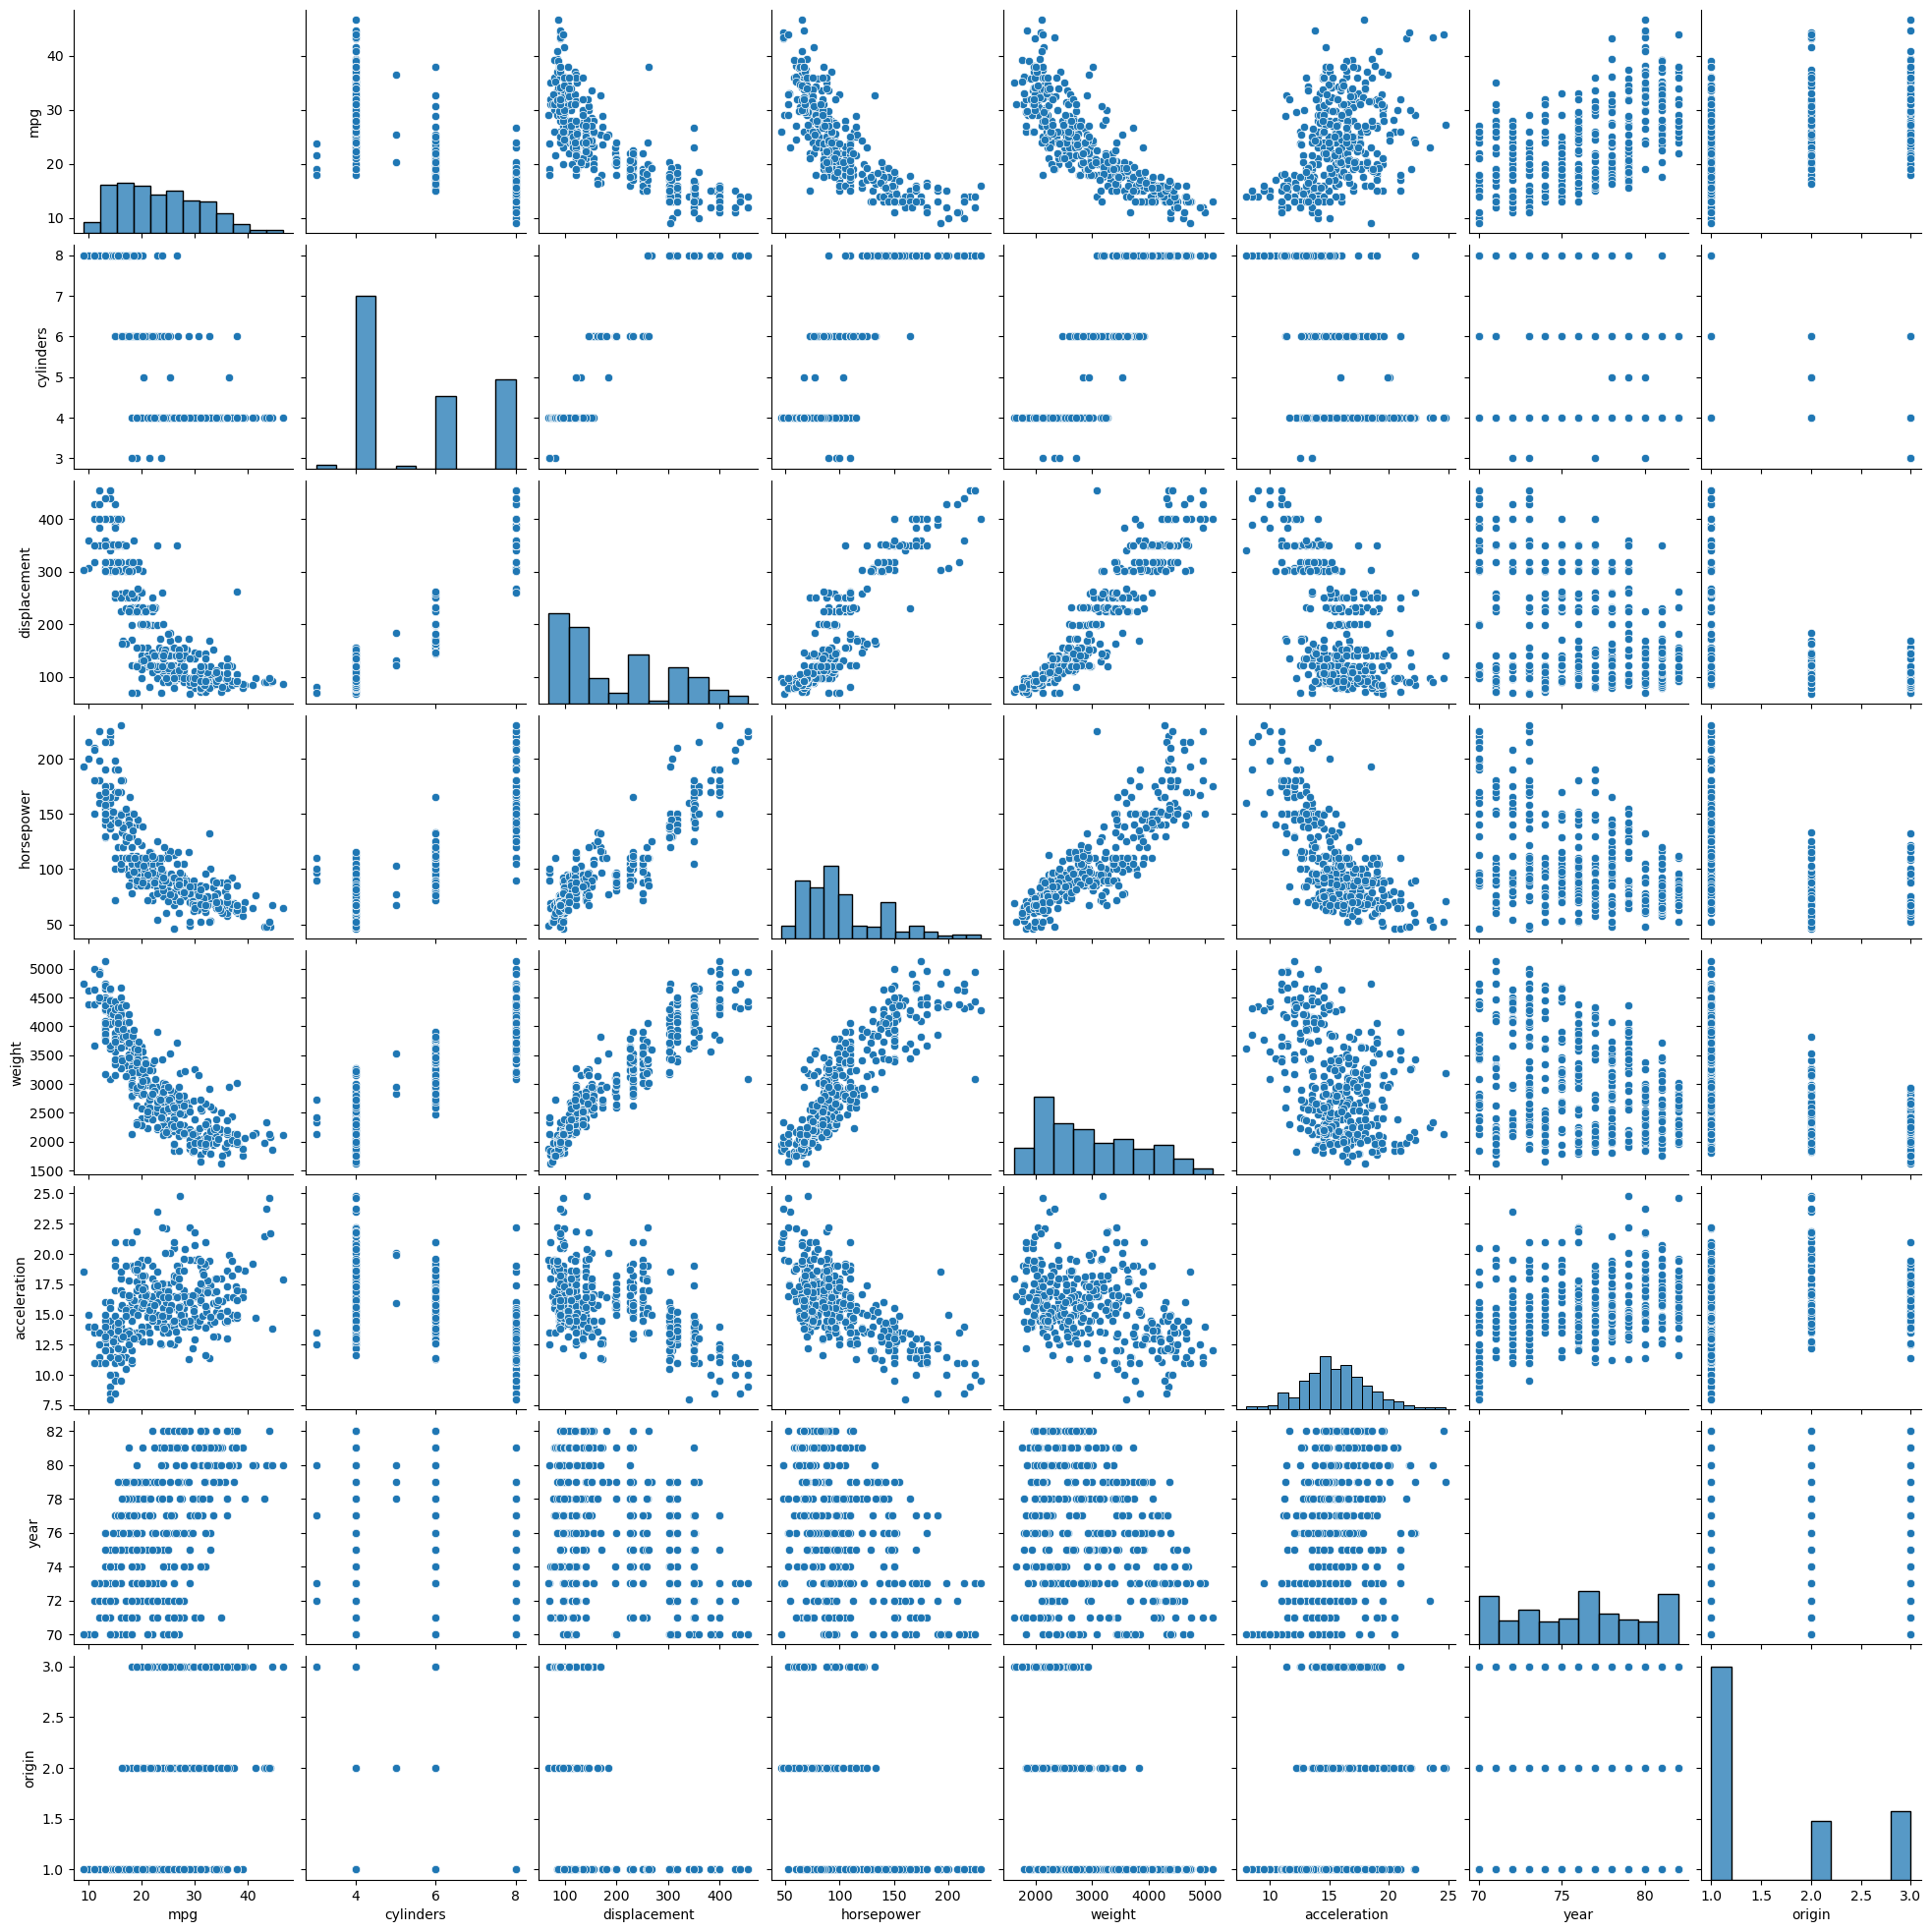

In [35]:
sns.pairplot(data)
plt.show()

### Compute the matrix of correlations between the variables using the fun *cor( )*. You will need to exclude the *name* variable, which is qualitative.

In [36]:
# Drop 'name' as it is qualitative

data = data.drop(columns=['name'])

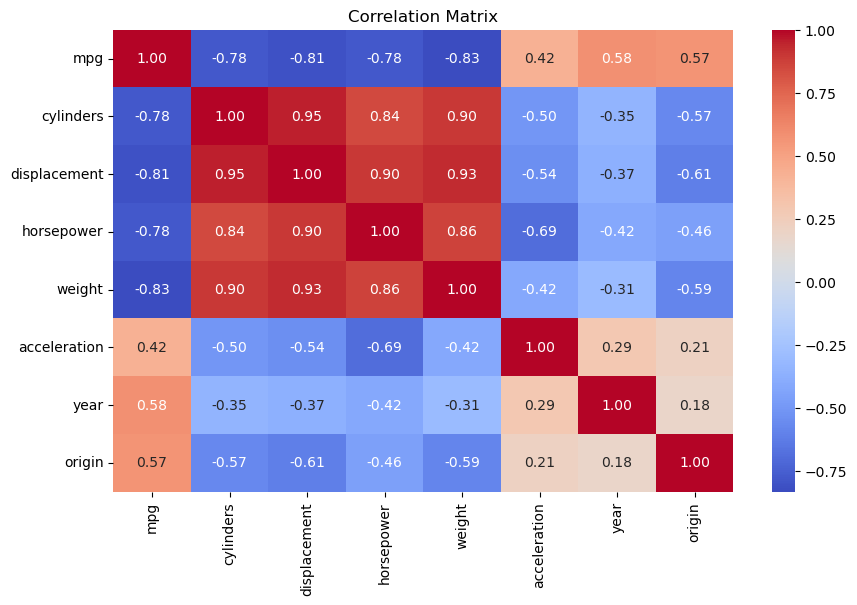

In [37]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### use the "lm( )* function to performa  multiple linear regression with *mpg* as the response and all other variables except *name* as the predictors. Use the *summary( )* function to print the results.
### Comment on the output. For instance:

### 1.Is there a relationship between the predictors and the response?
### 2.Which predictors appear to have a statistically significant relationship to the response?
### 3.What does the coefficient for the *year* variable suggest?

In [38]:
# Extract R-squared and F-statistic to assess the overall relationship

r_squared = model.rsquared
f_statistic = model.fvalue
f_p_value = model.f_pvalue

# Print the results

print(f"R-squared: {r_squared}")
print(f"F-statistic: {f_statistic}")
print(f"p-value of F-statistic: {f_p_value}")


R-squared: 0.8214780764810597
F-statistic: 252.42804529131897
p-value of F-statistic: 2.0371059307552074e-139


In [39]:
# Multiple Linear Regression
X = data.drop(columns=['mpg'])  # Independent variables
y = data['mpg']  # Dependent variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        10:11:41   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [40]:
# Set significance level (typically 0.05)
alpha = 0.05

# Get p-values of predictors
significant_predictors = model.pvalues[model.pvalues < alpha]

# Print significant predictors
print("Statistically significant predictors:")
print(significant_predictors)


Statistically significant predictors:
const           2.401841e-04
displacement    8.444649e-03
weight          7.874953e-21
year            3.055983e-39
origin          4.665681e-07
dtype: float64


In [43]:
# Extract the coefficient and p-value for the 'year' variable

year_coef = model.params["year"]
year_p_value = model.pvalues["year"]

# Print the results
year_coef, year_p_value

# 3.What does the coefficient for the *year* variable suggest?
# The coefficent is positive which suggests that as the car get older as it consumes more fue;s. More specifically, for the each year the consumes .75mpg more fuel

(0.750772677950313, 3.055982581074818e-39)

### Use the *plot( )* function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any onservations with unusually high leverage?

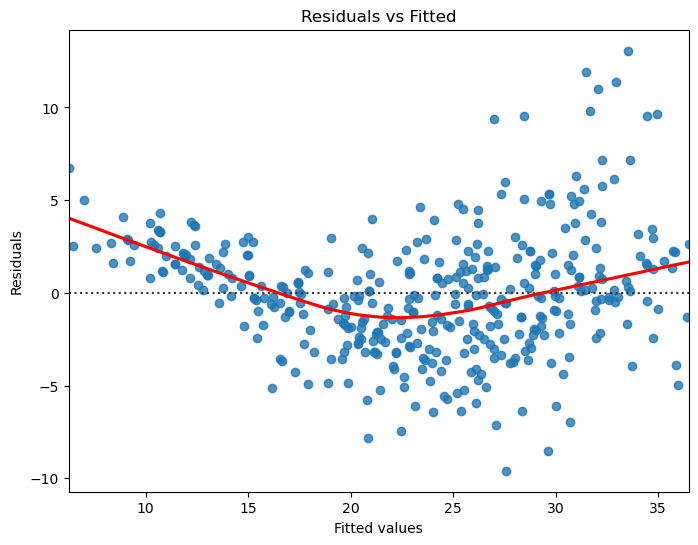

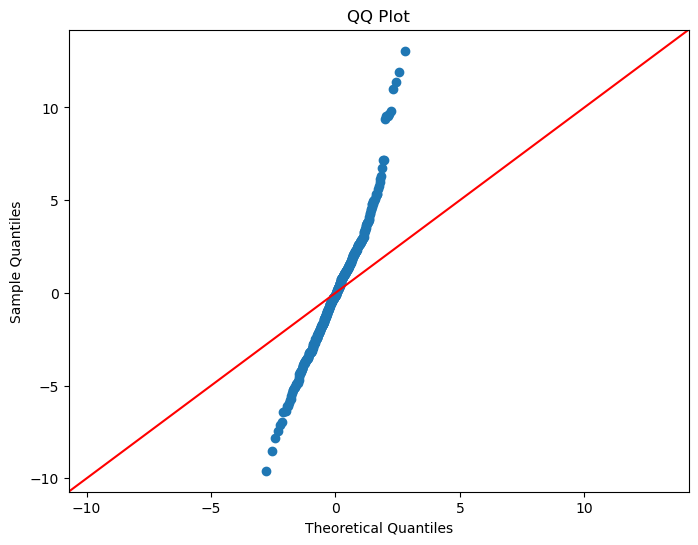

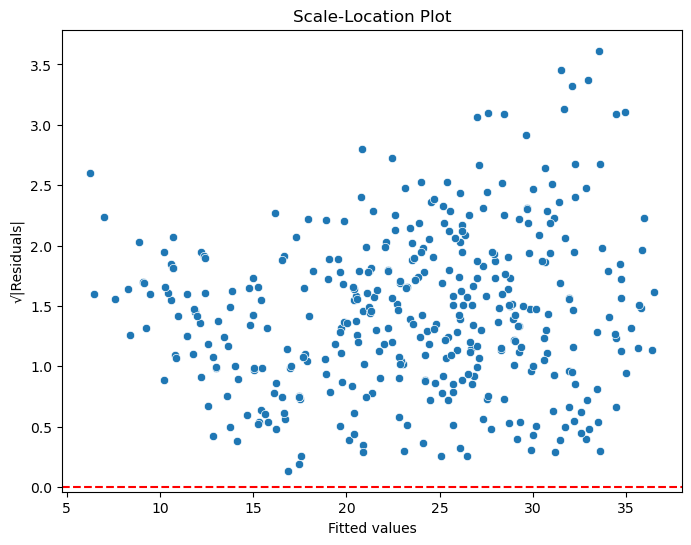

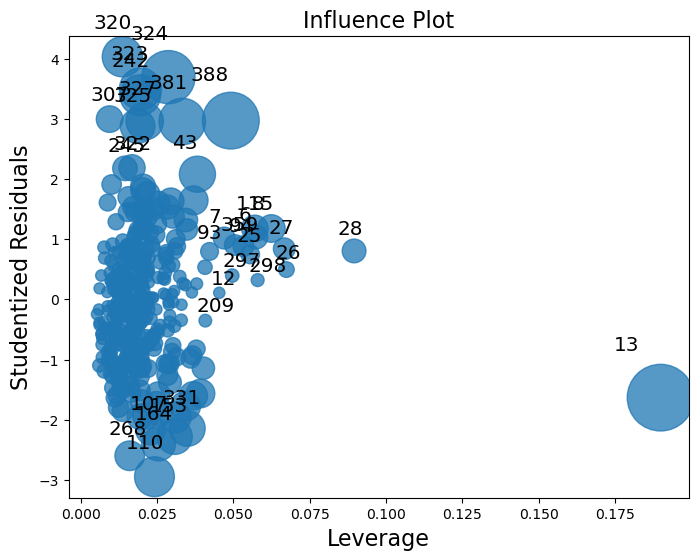

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax, line_kws={'color': 'red'})
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted")
plt.show()

# 2. QQ Plot for Normality of Residuals
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(model.resid, line='45', ax=ax)
ax.set_title("QQ Plot")
plt.show()

# 3. Scale-Location Plot (Homoscedasticity Check)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=abs(model.resid)**0.5)
ax.set_xlabel("Fitted values")
ax.set_ylabel("√|Residuals|")
ax.set_title("Scale-Location Plot")
plt.axhline(y=0, color='red', linestyle='dashed')
plt.show()

# 4. Influence Plot (High Leverage Points)
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()


### use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [47]:
import statsmodels.formula.api as smf

# Define formula with interaction terms
formula = "mpg ~ cylinders * displacement + horsepower * weight + acceleration * year + origin * year"

# Fit the regression model
interaction_model = smf.ols(formula=formula, data=data).fit()

# Display summary
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     243.0
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.34e-164
Time:                        10:28:29   Log-Likelihood:                -952.79
No. Observations:                 392   AIC:                             1930.
Df Residuals:                     380   BIC:                             1977.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                116